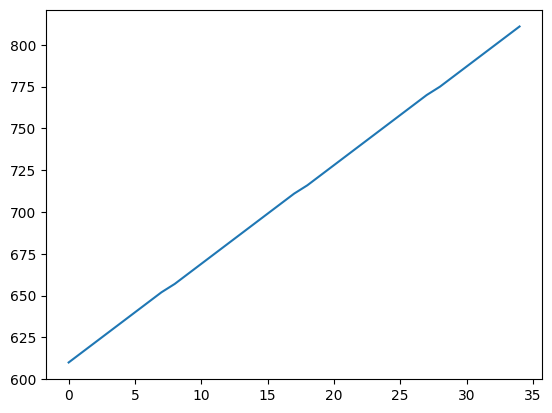

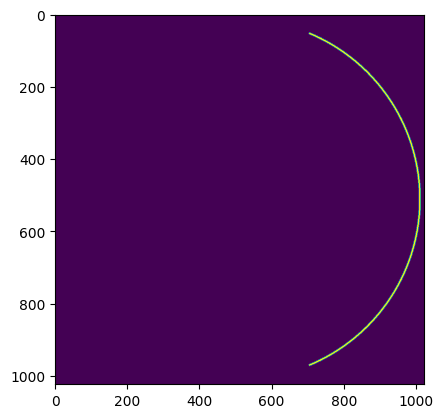

Processing subtraction for image  0
145
145
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270
 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360
 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445 450
 455 460 465 470 475 480 485 490 495 500 505 510 515 520 525 530 535 540
 545 550 555 560 565 570 575 580 585 590 595 600 605 610 615 620 625 630
 635 640 645 650 655 660 665 670 675 680 685 690 695 700 705 710 715 720
 725]
145
145
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270
 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 360
 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 4

c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:20: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB


Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17
Processing calculations for image  18
Processing calculations for image  19
Processing calculations for image  20
Processing calculations for image  21
Processing calculations for image  22
Processing calculations for image  23
Processing calculations for image  24
Processing calculations for image  25
Processing calculations for image  26
Processing calculatio

In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


#Array of the front of the CME through human analysis

#for first CME

#original
front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]

# +50
# front_array_absolute = [[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230]]

# -10
# front_array_absolute = [[512,413],[512,392],[512,356],[512,330],[512,304],[512,275],[512,252]]

#                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), front_array_absolute[:,1])
front_array_absolute = np.zeros((35,2), dtype=int)
front_array_absolute[:,0] = np.full(35, 512)
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,50), *parameters)))

plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,50,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 5
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))

allIndices = calculateRadialBands(pBdata[0],direction='right')

# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')



for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 
    median_values_pb, r_values = calculateMedianPixelValues(pBdata[i],allIndices)
    median_values_tb, r_values = calculateMedianPixelValues(tBdata[i],allIndices)
    # median_values = median_values[13:]
    # r_values = r_values[13:]
  
   

    # pBdata[i] = functionFitSubtract(pBdata[i], front_array_absolute[i,:], 'right')
    # tBdata[i] = functionFitSubtract(tBdata[i], front_array_absolute[i,:], 'right')
    pBdata[i] = subtractRadialMedian(pBdata[i], median_values_pb)   
    tBdata[i] = subtractRadialMedian(tBdata[i],median_values_tb)  
    # pBdata[i] = minSmooth(pBdata[i], 50)  
    # tBdata[i] = minSmooth(tBdata[i], 50)   
    
    # pBdata[i],tBdata[i] = nearbyPointSubtract(pBdata[i],tBdata[i], front_array_absolute[i], 30, allIndices, direction='left')
    

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat

C:\Users\glenn\AppData\Local\Temp\ipykernel_9160\3724283338.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pos m:  0.0
pos b:  0.0
pos mean:  0.0
pos sigma: 0.0
neg m:  0.0
neg b:  0.0
neg mean:  0.0
neg sigma: 0.0


ValueError: vmin must be less or equal to vmax

<Figure size 1500x700 with 29 Axes>

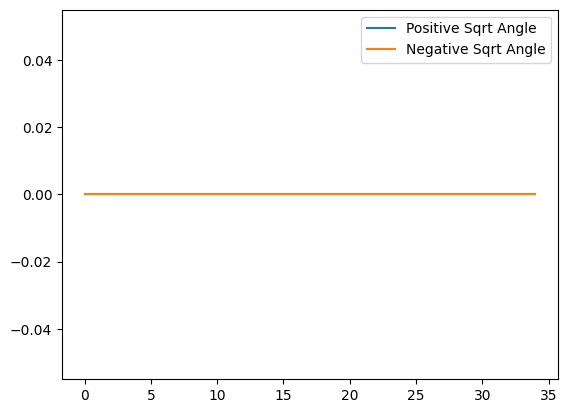

In [10]:
# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750


vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([yMin,xMin])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 7), sharex=True, sharey=True)

for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmax=vmax, cmap='hsv')
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[1,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')
    axs[2,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'g+', color='lime')
    axs[3,i].plot(front_array_adj[5*i][1], front_array_adj[5*i][0], 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,35),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,35),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


plt.figure()   
plt.plot(posMatsGraph, label='Positive Sqrt Angle')
plt.plot(negMatsGraph, label='Negative Sqrt Angle') 
plt.legend() 
plt.show()

In [8]:

print(front_array_adj[2])
print(posMatsData[2][front_array_adj[2][0],front_array_adj[2][1]])

[262 122]
0.0
